# Introductions
We're interested in finding which neighborhoods in Pittsburgh are best for non-motorized transportation.

Note: What about walkability? This seems more like determining which neighborhoods are best to bike in/ which neighborhoods people bike in the most. We have the safety for biking, the
https://data.wprdc.org/dataset/station-locations

# The Metric

# The Best Neighborhood

In [1]:
from os import mkdir
from os.path import join, exists
from urllib.request import urlopen
import pandas as pd
import geopandas

In [2]:
# Downloading the data if it hasn't been downloaded yet
urls = [
        "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/722bace4-98a3-456b-9029-7d64090e5bd6/download/pogoh-station-locations-october-2023.xlsx",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/bab6ee9a-81dd-411f-90b3-b65ddc6009f3/download/pogoh-station-locations-august-2023-1.xlsx",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/dc292334-97be-42d1-822f-8c4e41229920/download/pogoh-station-locations-july-2023.xlsx",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/f7112f90-0708-4574-9feb-fee9f4caaa36/download/pogoh-station-locations-june-2023.xlsx",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/a0dbb725-fdc0-481e-b082-d3670bcef3be/download/pogoh-station-locations-february-2023.xlsx",
        "https://data.wprdc.org/dataset/40af8f91-000b-4e75-8ed1-9530360258d2/resource/d7778721-e9c7-4d2f-a9c1-4f317db140a1/download/pogoh-station-locations-may-2022.xlsx"
    ]

def download_file(url, folder):
    with urlopen(url) as f:
            filename = url.split('/')[-1]
            with open(join(folder, filename), 'w+b') as g:
                g.write(f.read())

if not exists('data'):
    mkdir('data')
    for url in urls:
        download_file(url, folder='data')

<Axes: >

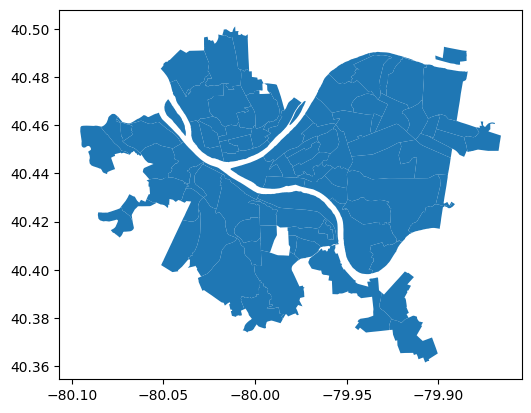

In [3]:
# Reading the shapefile
neighborhoods = geopandas.read_file(join('data','pittsburghpaneighborhoods-.zip'))
neighborhoods.plot()

In [4]:
# Reading the data into one dataframe, adding the dates onto them
from glob import glob
dataframes = []
for file in glob(join('data', '*.xlsx')):
    dataframe = pd.read_excel(file)
    date = ' '.join(file.replace('.','-').split('-')[3:5])
    dataframe['date'] = pd.to_datetime(date, format='%B %Y')
    dataframes.append(dataframe)

df = pd.concat(dataframes)

<Axes: >

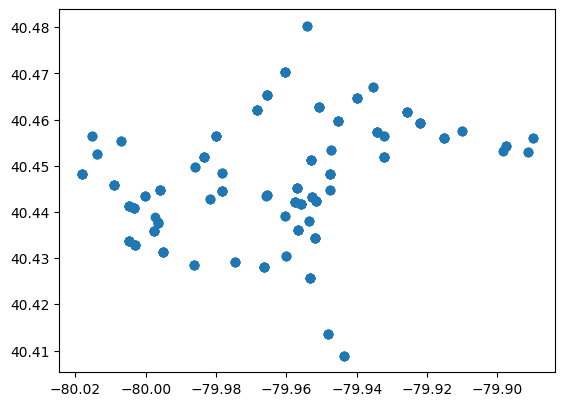

In [36]:
# Converting longitude and latitude values into shapely objects / converting from pandas to geopandas
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

# Adding the neighborhoods to the data
gdf = gdf.sjoin(neighborhoods)

gdf.plot()

In [6]:
gdf.head()

,Id,Name,Total Docks,Latitude,Longitude,date,geometry,index_right,OBJECTID,fid_blockg,...,plannerass,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len
0,1,Pierce St & Summerlea St,18,40.456507,-79.932331,2023-08-01,POINT (-79.93233 40.45651),75,76,167,...,Christian Umbach,SDE,2020-08-14,SDE,2020-08-14,None,25673624.0,08cfd3ac-e8f8-4d3d-86fc-534367f67428,2.565262e+07,25073.867348
10,11,Ellsworth Ave & N Neville St,15,40.448203,-79.947507,2023-08-01,POINT (-79.94751 40.44820),75,76,167,...,Christian Umbach,SDE,2020-08-14,SDE,2020-08-14,None,25673624.0,08cfd3ac-e8f8-4d3d-86fc-534367f67428,2.565262e+07,25073.867348
14,15,Ivy St & Walnut St,15,40.451781,-79.932253,2023-08-01,POINT (-79.93225 40.45178),75,76,167,...,Christian Umbach,SDE,2020-08-14,SDE,2020-08-14,None,25673624.0,08cfd3ac-e8f8-4d3d-86fc-534367f67428,2.565262e+07,25073.867348
15,16,Penn Ave & Putnam St (Bakery Square),19,40.455900,-79.915300,2023-08-01,POINT (-79.91530 40.45590),75,76,167,...,Christian Umbach,SDE,2020-08-14,SDE,2020-08-14,None,25673624.0,08cfd3ac-e8f8-4d3d-86fc-534367f67428,2.565262e+07,25073.867348
29,30,Shady Ave & Ellsworth Ave,15,40.459181,-79.921996,2023-08-01,POINT (-79.92200 40.45918),75,76,167,...,Christian Umbach,SDE,2020-08-14,SDE,2020-08-14,None,25673624.0,08cfd3ac-e8f8-4d3d-86fc-534367f67428,2.565262e+07,25073.867348


In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 293 entries, 0 to 56
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           293 non-null    int64         
 1   Name         293 non-null    object        
 2   Total Docks  293 non-null    int64         
 3   Latitude     293 non-null    float64       
 4   Longitude    293 non-null    float64       
 5   date         293 non-null    datetime64[ns]
 6   geometry     293 non-null    geometry      
 7   index_right  293 non-null    int64         
 8   OBJECTID     293 non-null    int64         
 9   fid_blockg   293 non-null    int64         
 10  statefp10    293 non-null    object        
 11  countyfp10   293 non-null    object        
 12  tractce10    293 non-null    object        
 13  blkgrpce10   293 non-null    object        
 14  geoid10      293 non-null    object        
 15  namelsad10   293 non-null    object        
 16  mtfcc1

In [32]:
# Counting up which neighborhood has the most 
neighborhood_count = gdf.groupby('hood')['Total Docks'].sum().sort_values(ascending=False)
neighborhood_count

hood
Central Oakland              661
Central Business District    546
North Oakland                438
Shadyside                    427
South Side Flats             380
Bloomfield                   327
Strip District               261
Hazelwood                    242
South Shore                  180
Lower Lawrenceville          156
North Shore                  138
Terrace Village              126
Allegheny Center             114
Chateau                      114
Homewood South               111
East Liberty                  90
Middle Hill                   90
Central Lawrenceville         90
Friendship                    90
South Oakland                 57
Upper Lawrenceville           57
Bedford Dwellings             57
Crawford-Roberts              57
Central Northside             57
Larimer                       45
Garfield                      45
Homewood North                45
Name: Total Docks, dtype: int64

In [44]:
neighborhood_count.head()

hood
Central Oakland              661
Central Business District    546
North Oakland                438
Shadyside                    427
South Side Flats             380
Name: Total Docks, dtype: int64

<Axes: >

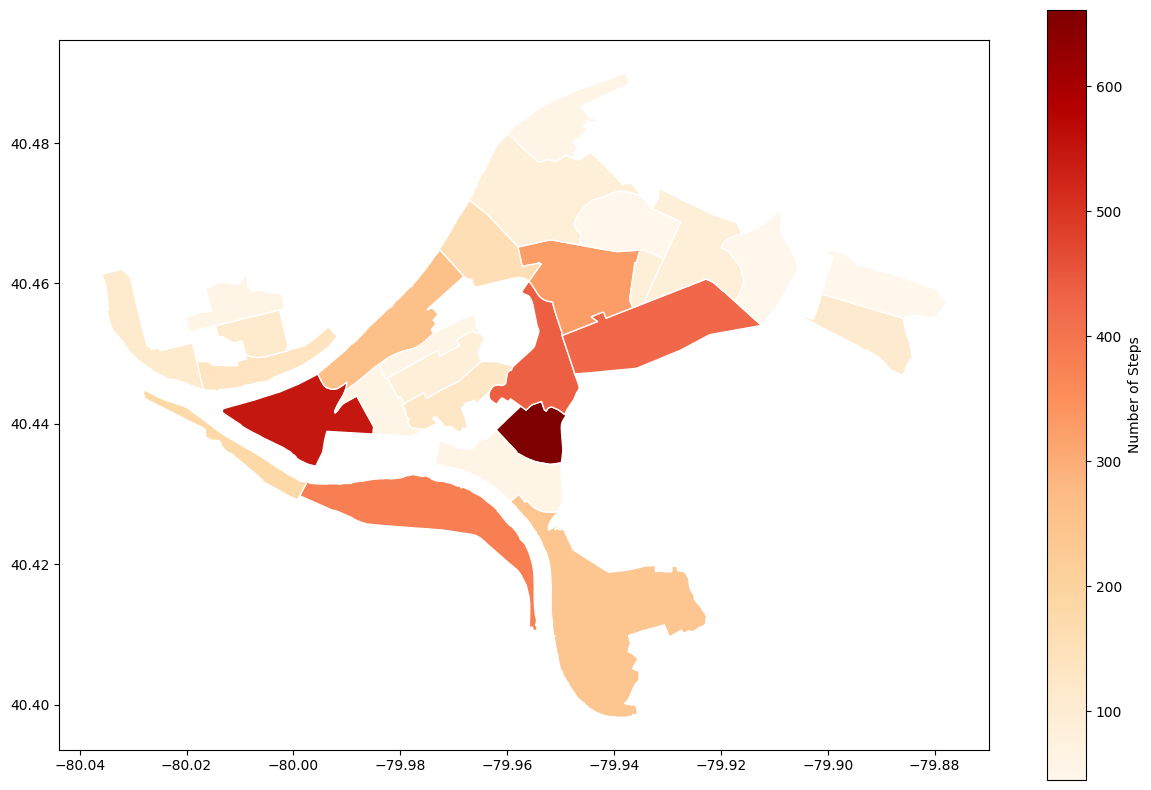

In [43]:
neighborhood_map = neighborhoods.merge(neighborhood_count, how='right', on='hood')
neighborhood_map.plot(column='Total Docks', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

# Conclusion